# Algerian Forest Fire Data Exploratory Data Analysis

By Rajan Kumar

**Life Cycle of Data Science**


1. Understanding the Problem Statement
2. Data Collection
3. Data Cleaning
4. Exploratory Data Analysis
5. Feature Engineering 
6. Predictive Modeling
7. Data Visualization

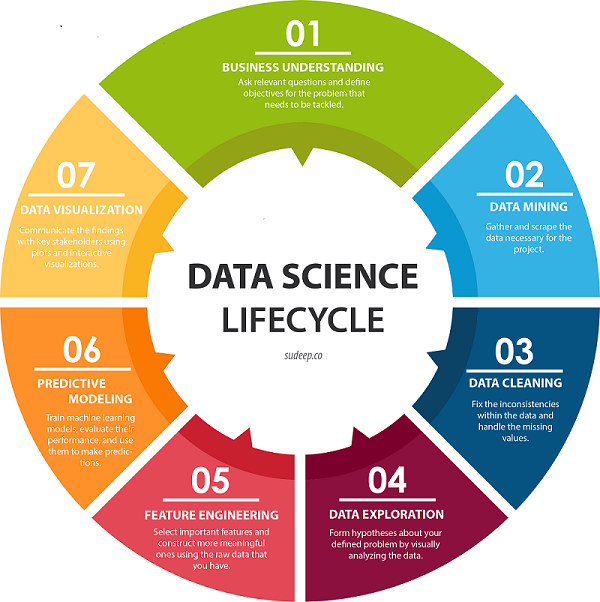

Data Set Used "Algerian Forest Fires Dataset Data Set" from UCI Machine Learning Repository 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



**The data "Algerian forest fires dataset" csv file**

In [4]:
import warnings

warnings.filterwarnings("ignore")

In [33]:
#Reading the dataset
df=pd.read_csv(r'C:\Users\Rajan\Downloads\Algerian_forest_fires_dataset_UPDATE.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [34]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [35]:
#datatypes

df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
dtype: object

In [36]:
#checking if any null or missing values are there in data

df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [37]:
# checking if any duplicate values are present

df.duplicated().sum()

0

**Descriptive statistics**

In [38]:
df.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244,244.000000,244.000000,244,243
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198,NaN,NaN,126,8
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,0.4,fire
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,12,131
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,NaN,4.774180,16.664754,NaN,NaN
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,NaN,4.175318,14.204824,NaN,NaN
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,NaN,0.000000,1.100000,NaN,NaN
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,NaN,1.400000,6.000000,NaN,NaN
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,NaN,3.500000,12.250000,NaN,NaN
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,NaN,7.300000,22.525000,NaN,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


In [40]:
df.shape

(244, 14)

In [44]:
#datacleaning
df = df.drop(['Classes  '],axis=1)

In [45]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


**Histogram**

A heatmap is a graphical representation of data where each value of a matrix is represented as a color. This page explains how to build a heatmap with Python , with an emphasis on the Seaborn library.

<AxesSubplot:>

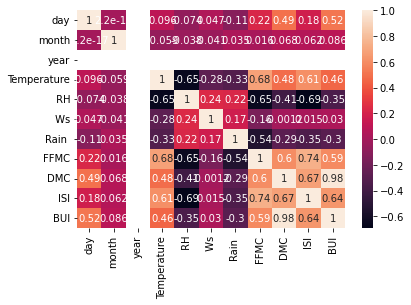

In [47]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#deleting Year as well
df = df.drop(['Classes  '],axis=1)

In [58]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


<AxesSubplot:>

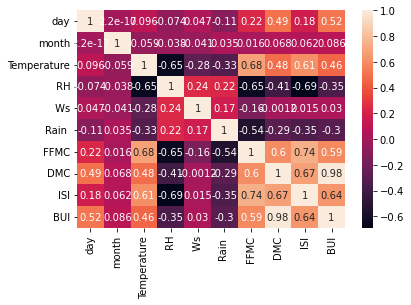

In [50]:
sns.heatmap(df.corr(),annot=True)

**Histogram Plot**

A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency



array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':' RH'}>,
        <AxesSubplot:title={'center':' Ws'}>,
        <AxesSubplot:title={'center':'Rain '}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'BUI'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

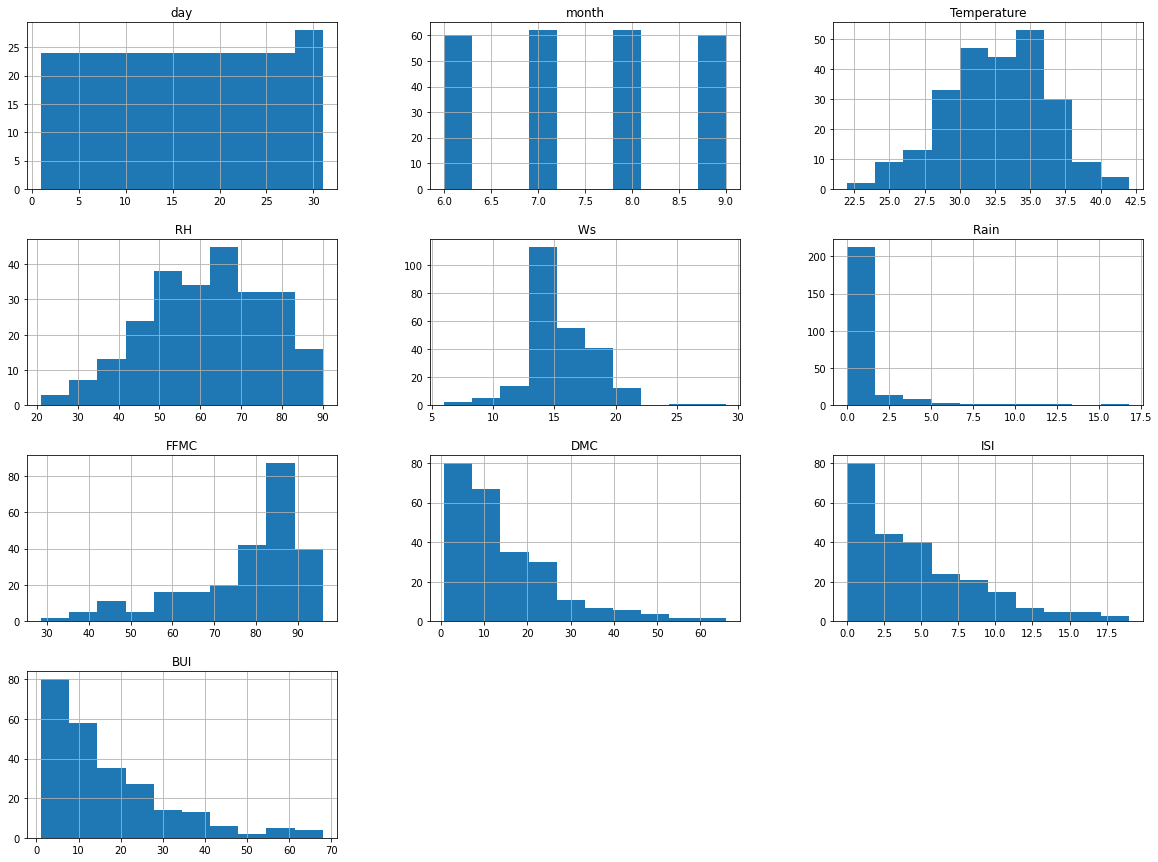

In [61]:
df.hist(figsize=(20,15))

**LinePlot**

From simple to complex visualizations, it's the go-to library for most. In this tutorial, we'll take a look at how to plot a line plot in Matplotlib - one of the most basic types of plots. Line Plots display numerical values on one axis, and categorical values on the other.

<AxesSubplot:xlabel='Temperature', ylabel='day'>

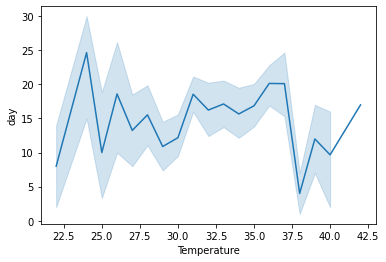

In [63]:
sns.lineplot(x='Temperature', y='day', data=df)

**PairPlot**

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

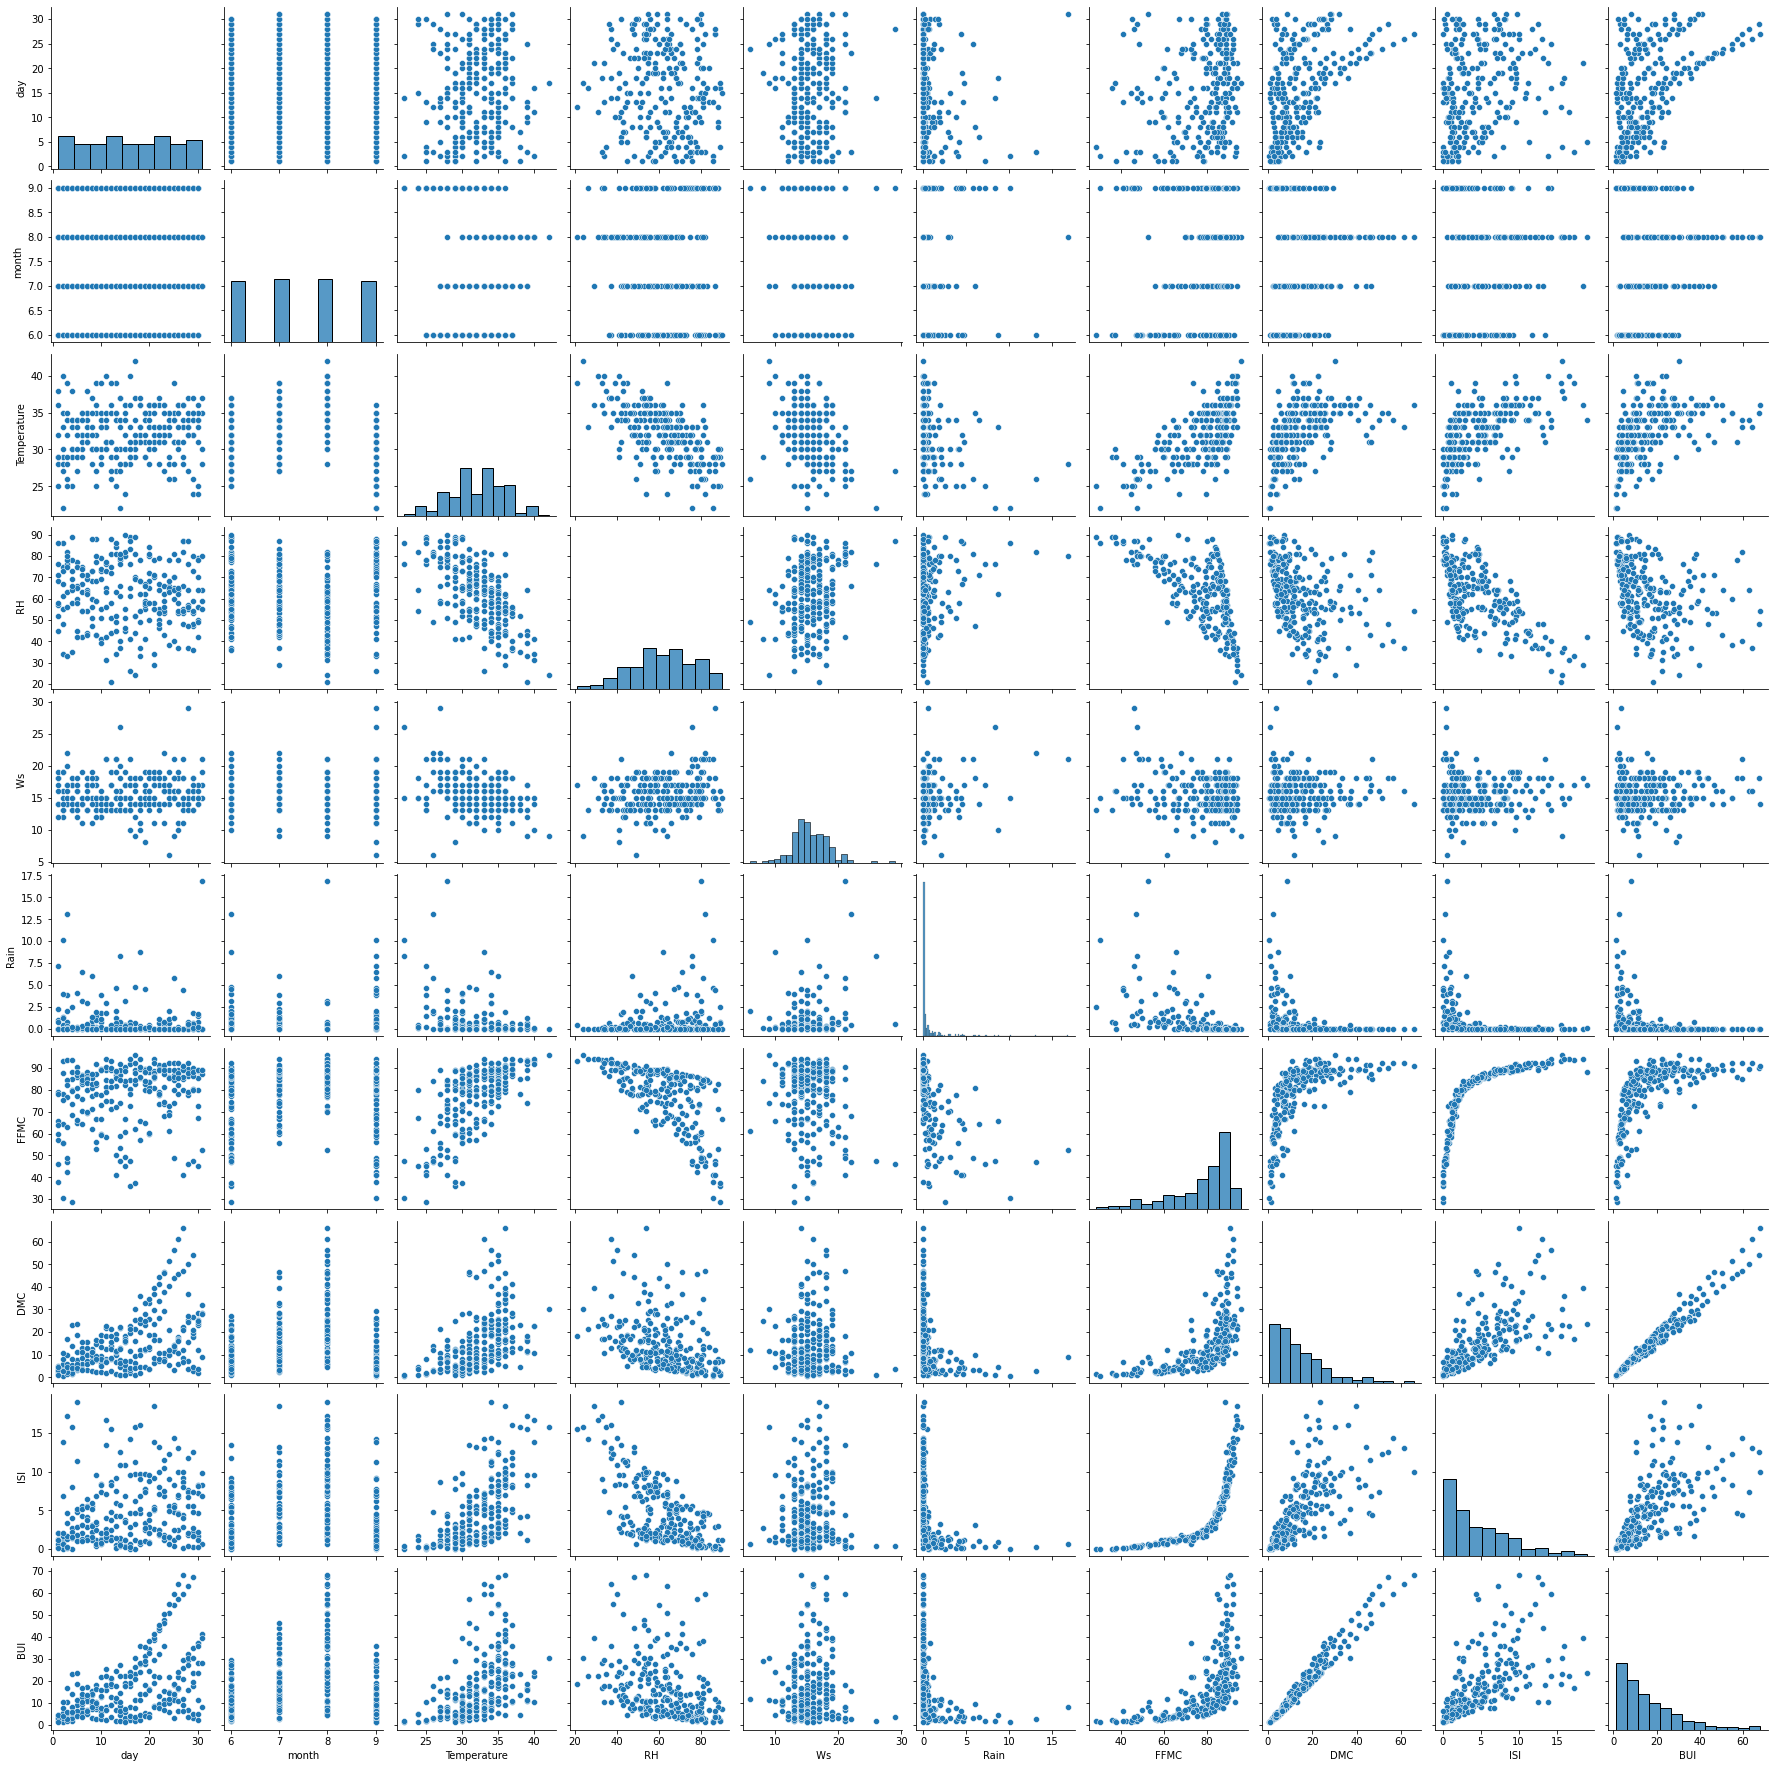

In [64]:
sns.pairplot(df)

**JOINTPLOT**

Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins.
This plot is a convenience class that wraps JointGrid.

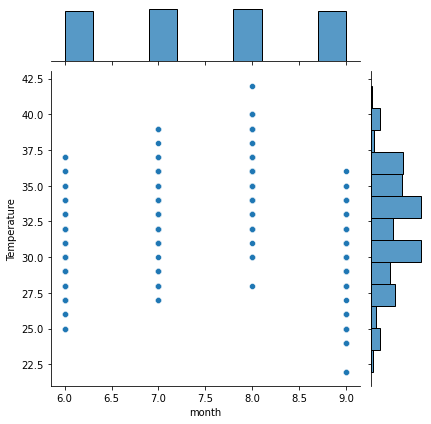

In [66]:
sns.jointplot(x='month',y='Temperature',data=df)

In [68]:
df.columns

Index(['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC',
       'DC', 'ISI', 'BUI', 'FWI'],
      dtype='object')

**Barplot**

Image result for barplot in python
A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically. A bar chart describes the comparisons between the discrete categories.


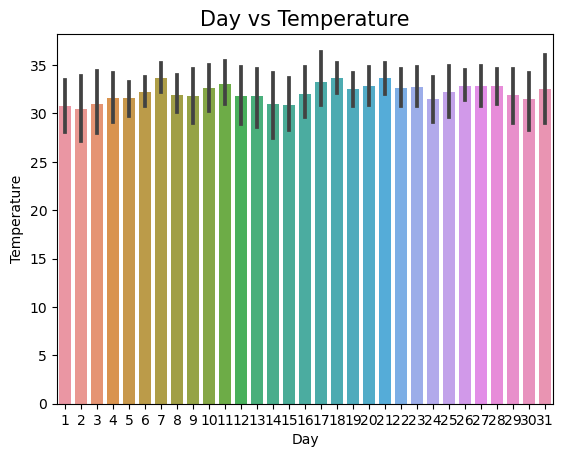

In [69]:
#Highest Temperature attained on days

plt.style.use("default")
sns.barplot(x="day", y="Temperature",data=df)
plt.title("Day vs Temperature",fontsize=15)
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.show()

**BoxPlot**

A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum.

<AxesSubplot:>

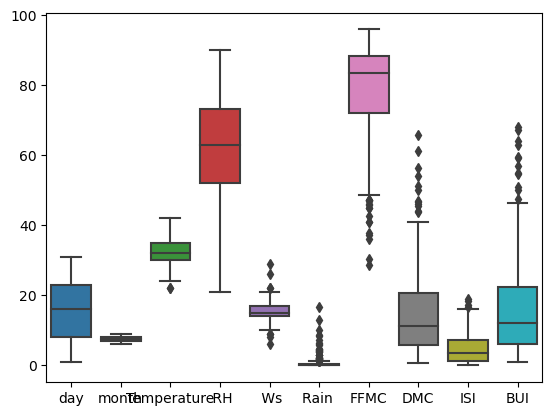

In [94]:
sns.boxplot(data = df, orient='v')

#boxplot is used to find outliers,
# here RH,Rain,FFMC, ISI and BUI has many outliers

# Observations/Questions

Highest Temperature in the dataset

In [70]:
df.Temperature.max()

42

Lowest Temperature in the dataset

In [71]:
df.Temperature.min()

22

When did it rain the most

the 31st day in the 8th month with 16.8mm of rainfall

In [74]:
highest_rain = df.sort_values(by='Rain ', ascending=False)[['Rain ', 'day','month']].head(1)
highest_rain

,Rain,day,month
91,16.8,31,8


What did it rain the least

the 6th month with 0.0mm of rainfall


In [75]:
lowest_rain = df.sort_values(by='Rain ', ascending=True)[['Rain ', 'day', 'month']].head(1)
lowest_rain

,Rain,day,month
0,0.0,1,6


What month is the hottest

the 8th month


In [76]:
highest_month = df.sort_values(by='Temperature', ascending=False)[['month']].head(1)
highest_month

,month
199,8


what day has the highest temperature in the dataset?

The highest Temperature is 42 degrees and it occured on the 17th of  the 8th Month.


In [77]:
highest_temp = df.sort_values(by='Temperature', ascending=False)[['Temperature','day','month']].head(1)
highest_temp

,Temperature,day,month
199,42,17,8


In [85]:
highest_temp = df.sort_values(by='Temperature', ascending=False)[['Temperature', 'day','month', 'Rain ']].head(1)


print("Highest Temperatures")
print(highest_temp)

Highest Temperatures
     Temperature  day  month  Rain 
199           42   17      8    0.0


In [90]:
lowest_temp =  df.sort_values(by='Temperature', ascending=True)[['Temperature', 'day','month', 'Rain ']].head(1)

print("Lowest Temperatures")
print(lowest_temp)

Lowest Temperatures
     Temperature  day  month  Rain 
105           22   14      9    8.3


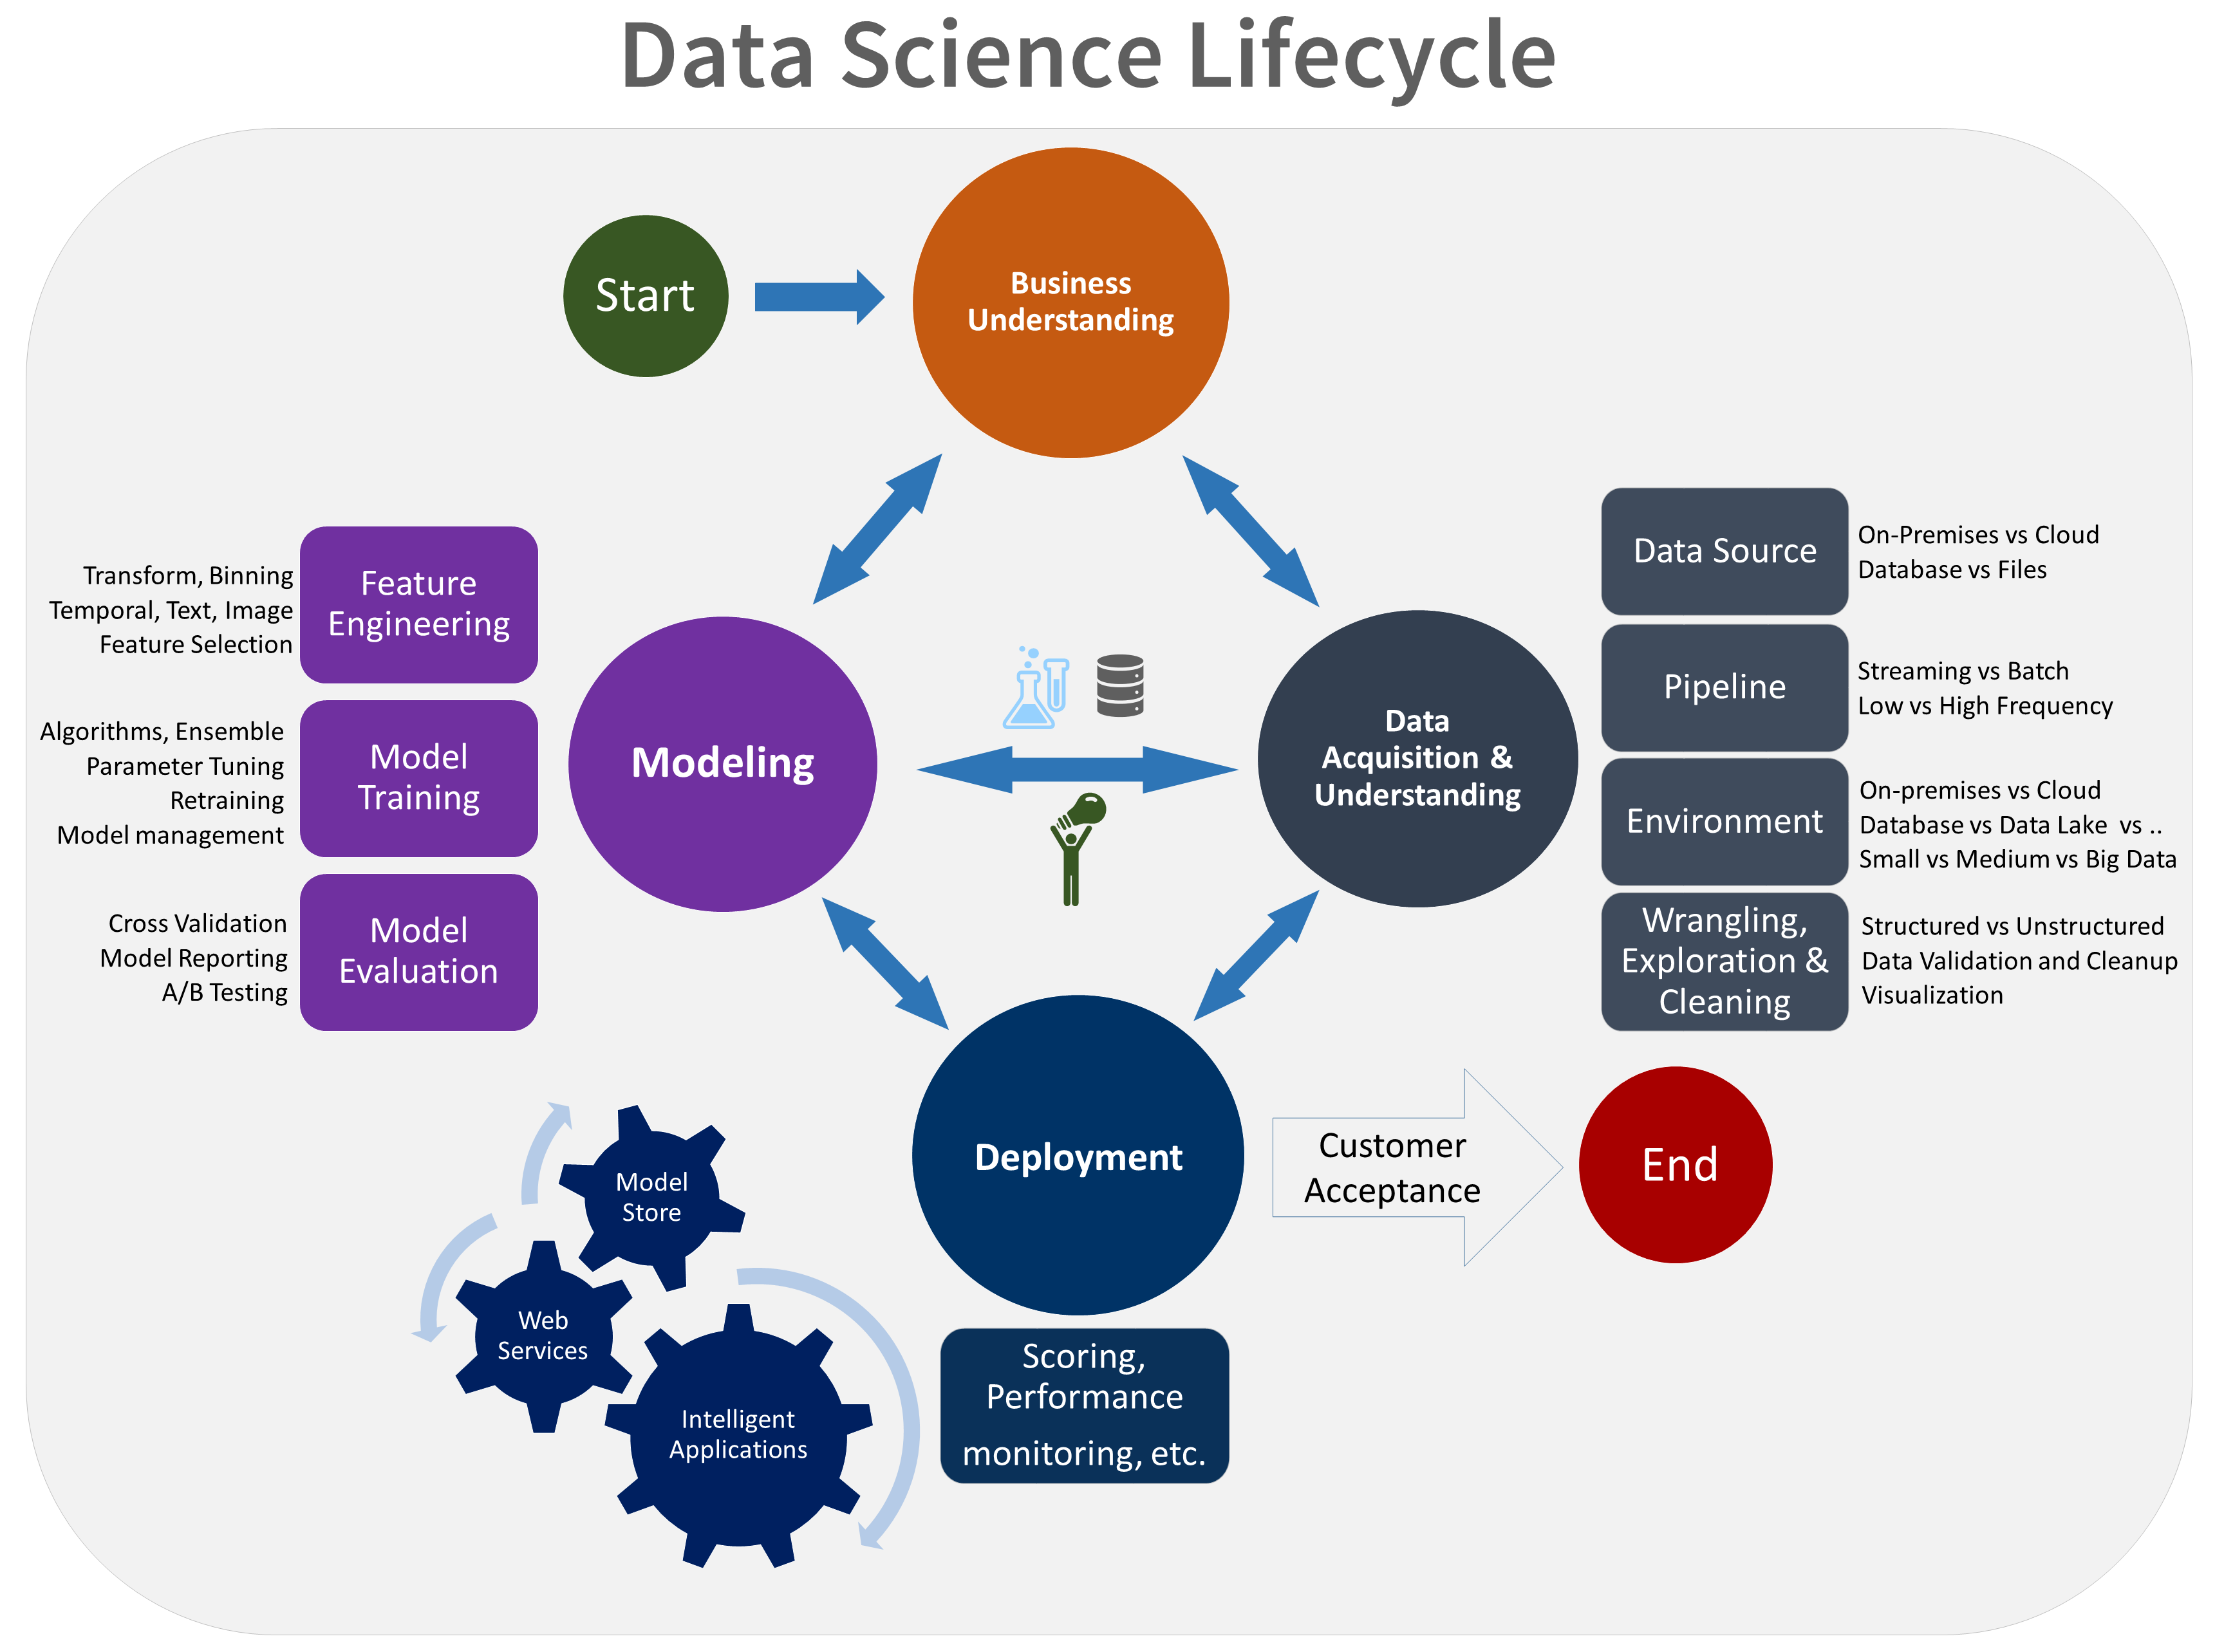